### Questions I want to answer 

+ By year, what is the relationship between the top 10 states death rates and their relative per capita income
+ Using a pie chart, by year, show the relationship between the total death rates by race for the top 3 states
+ Line plot showing the overdose deaths by year across top 5 states


In [20]:
#import dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
census_csv = "census_income.csv"
opioid_years_csv = "detailed_mortality.csv"

In [22]:
opioid_df = pd.read_csv(opioid_years_csv)
opioid_df.head()

opioid_df["Year"] = opioid_df["Year"].apply(int) #applies int to all of the years

In [23]:
census_df = pd.read_csv(census_csv)
census_df.sort_values(by = "Poverty Rate",ascending = False).head()

,State,Population,Number of Persons in Poverty,Median Household Income,Per Capita Income,Year,Poverty Rate
351,Puerto Rico,3583073.0,1616117.0,19350.0,11394.0,2015,45.104216
311,Puerto Rico,3638965.0,1630965.0,19686.0,11331.0,2014,44.819475
155,Puerto Rico,3742586.0,1676055.0,19122.0,10658.0,2011,44.783340
415,Puerto Rico,3529385.0,1577075.0,19606.0,11688.0,2016,44.684131
103,Puerto Rico,3762322.0,1680370.0,18791.0,10355.0,2010,44.663110


In [24]:
merged_df = pd.merge(census_df,opioid_df,how="outer",on=["State","Year"])

In [25]:
#includes all the merged data and dropping all the na's 

opioid_census_df = merged_df.rename(columns={"Population_x":"Population by Race/Age Group/Gender per State",
                          "Population_y":"Total State Population",
                          "Number of Persons in Poverty":"Number of Persons in Poverty per State" })

opioid_census_df.head()

opioid_census_df=opioid_census_df.dropna(how="any")
opioid_census_df.head() 

,State,Population by Race/Age Group/Gender per State,Number of Persons in Poverty per State,Median Household Income,Per Capita Income,Year,Poverty Rate,Race,Ten-Year Age Groups,Ten-Year Age Groups Code,Gender,Gender Code,Deaths,Total State Population,Crude Rate
0,Alaska,683142.0,64038.0,64635.0,29382.0,2009,9.374039,White,45-54 years,45-54,Male,M,12.0,45671.0,Unreliable
1,Alabama,4633360.0,757833.0,41216.0,22732.0,2009,16.356014,White,15-24 years,15-24,Male,M,14.0,227585.0,Unreliable
2,Alabama,4633360.0,757833.0,41216.0,22732.0,2009,16.356014,White,25-34 years,25-34,Male,M,38.0,209864.0,18.1
3,Alabama,4633360.0,757833.0,41216.0,22732.0,2009,16.356014,White,35-44 years,35-44,Female,F,25.0,221942.0,11.3
4,Alabama,4633360.0,757833.0,41216.0,22732.0,2009,16.356014,White,35-44 years,35-44,Male,M,27.0,226271.0,11.9


# Grouped by Age and Year by State

In [26]:
#victoria is visualizing this 

opioid_census_df.groupby(["State","Ten-Year Age Groups","Year"])["Deaths"].sum().unstack()

Year                                2009   2010   2011   2012   2013   2014  \
State         Ten-Year Age Groups                                             
Alabama       15-24 years           14.0    NaN   13.0   11.0    NaN   15.0   
              25-34 years           38.0   34.0   51.0   54.0   60.0   70.0   
              35-44 years           52.0   35.0   51.0   39.0   50.0   80.0   
              45-54 years           62.0   49.0   64.0   70.0   56.0   79.0   
              55-64 years           15.0   10.0   13.0   24.0   36.0   71.0   
Alaska        25-34 years            NaN    NaN    NaN   14.0   13.0   10.0   
              35-44 years            NaN    NaN   11.0   10.0   15.0    NaN   
              45-54 years           12.0   12.0   12.0   16.0    NaN    NaN   
Arizona       15-24 years           63.0   52.0   56.0   37.0   74.0   52.0   
              25-34 years           97.0   92.0   94.0   72.0   99.0  125.0   
              35-44 years           92.0  113.0  107.0  104.0  121.0  121.0   
              45-54 years          150.0  163.0  158.0  163.0  194.0  183.0   
              55-64 years           84.0  106.0  109.0  107.0  135.0  177.0   
              65-74 years            NaN   11.0   29.0   33.0    NaN   58.0   
              75-84 years            NaN    NaN    NaN    NaN    NaN    NaN   
Arkansas      15-24 years           16.0    NaN   13.0   17.0   13.0   11.0   
              25-34 years           39.0   46.0   46.0   41.0   38.0   44.0   
              35-44 years           48.0   41.0   40.0   43.0   40.0   59.0   
              45-54 years           63.0   52.0   58.0   53.0   41.0   78.0   
              55-64 years           10.0   26.0    NaN   35.0   47.0   40.0   
              65-74 years            NaN    NaN    NaN    NaN    NaN    NaN   
California    15-24 years          103.0  123.0  137.0  106.0  112.0  109.0   
              25-34 years          230.0  230.0  273.0  220.0  282.0  263.0   
              35-44 years          406.0  317.0  346.0  304.0  336.0  303.0   
              45-54 years          730.0  663.0  690.0  602.0  643.0  623.0   
              55-64 years          509.0  470.0  556.0  574.0  600.0  648.0   
              65-74 years          104.0   93.0  114.0  109.0  173.0  190.0   
              75-84 years           26.0   14.0   33.0   30.0   43.0   32.0   
              85+ years              NaN   11.0    NaN    NaN   13.0   12.0   
Colorado      15-24 years           21.0   19.0   20.0   21.0   41.0   31.0   
...                                  ...    ...    ...    ...    ...    ...   
Vermont       55-64 years            NaN   10.0    NaN    NaN    NaN    NaN   
              65-74 years            NaN    NaN    NaN    NaN    NaN    NaN   
Virginia      15-24 years           44.0   16.0   51.0   35.0   44.0   54.0   
              25-34 years           76.0   83.0   95.0   86.0  160.0  153.0   
              35-44 years          125.0   79.0  133.0  102.0  129.0  181.0   
              45-54 years          134.0   96.0  138.0  107.0  159.0  164.0   
              55-64 years           38.0   39.0   50.0   36.0   94.0  104.0   
              65-74 years            NaN    NaN    NaN    NaN   12.0    NaN   
Washington    15-24 years           35.0   39.0   19.0   28.0   43.0   36.0   
              25-34 years           89.0   71.0   96.0   89.0   87.0   81.0   
              35-44 years          126.0  103.0  101.0   96.0  103.0   96.0   
              45-54 years          170.0  194.0  182.0  168.0  161.0  179.0   
              55-64 years          127.0  122.0  138.0  135.0  137.0  148.0   
              65-74 years           20.0   11.0   28.0   32.0   12.0   45.0   
              75-84 years            NaN    NaN    NaN    NaN    NaN    NaN   
              85+ years              NaN    NaN    NaN    NaN    NaN   10.0   
West Virginia 15-24 years            NaN   40.0   36.0   13.0   18.0   24.0   
              25-34 years           48.0  117.0  1

In [27]:
min(opioid_census_df["Per Capita Income"])

19534.0

In [28]:
max(opioid_census_df["Per Capita Income"])

48781.0

# GroupBy Race


In [139]:
total_death_population = opioid_census_df["Deaths"].sum()

race_df = opioid_census_df.groupby(["Race"])["Deaths"].sum().reset_index()
race_df["Death Rate"] = (race_df["Deaths"]/total_death_population)*100
race_df

,Race,Deaths,Death Rate
0,American Indian or Alaska Native,75.0,0.036190
1,Asian or Pacific Islander,320.0,0.154409
2,Black or African American,17894.0,8.634350
3,White,188953.0,91.175051


In [130]:
by_race = opioid_census_df.groupby(["Ten-Year Age Groups","Race"])["Deaths"].sum()
by_race.unstack()

by_race = opioid_census_df.groupby(["Ten-Year Age Groups","Race"])["Deaths"].sum()
by_race= by_race.reset_index()
by_race.head()


,Ten-Year Age Groups,Race,Deaths
0,15-24 years,Asian or Pacific Islander,10.0
1,15-24 years,Black or African American,43.0
2,15-24 years,White,14525.0
3,25-34 years,American Indian or Alaska Native,12.0
4,25-34 years,Asian or Pacific Islander,65.0


(0, 55103.0)

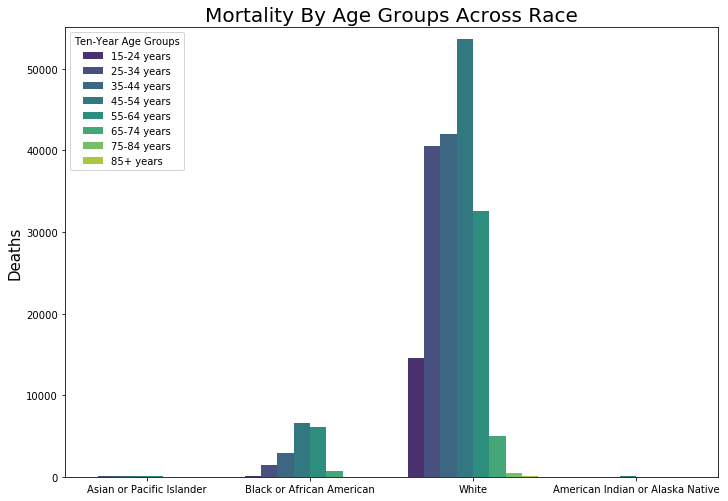

In [153]:
#bar visualization 
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)


race_mortality = sns.barplot(x="Race",y="Deaths",data=by_race,hue="Ten-Year Age Groups",palette="viridis")
plt.title("Mortality By Age Groups Across Race",size=20)
plt.xlabel("")
plt.xticks(size=10)
plt.ylabel("Deaths",size=15)
plt.ylim(0,max(by_race["Deaths"]) + 1500)

In [248]:
#pie chart with white people

white_race = by_race.loc[by_race["Race"] == "White"]
white_death_pop = white_race["Deaths"].sum()
white_race["Death Rate"] = (white_race["Deaths"] / white_death_pop)
white_race = white_race.reset_index(drop=True)
condensed_white = white_race[:-3]

condensed_white.loc[5] = ["65+ years","White",5656,0.029934]

/Users/EricaLei/anaconda/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/EricaLei/anaconda/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [247]:
condensed_white

,Ten-Year Age Groups,Race,Deaths,Death Rate
0,15-24 years,White,14525.0,0.076871
1,25-34 years,White,40560.0,0.214657
2,35-44 years,White,42005.0,0.222304
3,45-54 years,White,53603.0,0.283684
4,55-64 years,White,32604.0,0.172551
5,65+ years,White,5656.0,0.029934


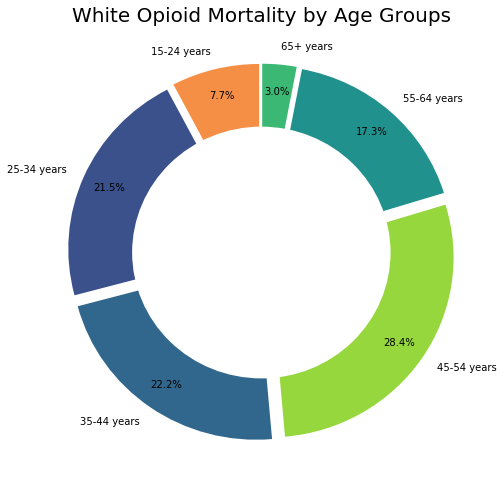

In [273]:
fig, ax = plt.subplots()
fig.set_size_inches(8.27, 8.27)

colors = ["#f68f46ff","#3b518bff","#31678dff","#97d73eff","#21918dff","#3cb875ff"]
labels = condensed_white["Ten-Year Age Groups"]
sizes = condensed_white["Death Rate"]

    
explode = (0.05,0.05,0.05,0.05,0.05,0.05)
plt.pie(sizes,labels=labels,colors = colors, autopct='%1.1f%%',startangle=90,pctdistance=0.85,explode=explode)

centre_circle =  plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("White Opioid Mortality by Age Groups",size=20)

# Group by Income Per Capita

In [56]:
bins=(10000.0,15000.0,20000.0,25000.0,30000.0,35000.0,40000.0,50000.0)
group_name=["10-15","15-20","20-25","25-30","30-35","35-40","40-50"]

income_deaths_df = pd.cut(opioid_census_df["Per Capita Income"],bins,labels=group_name)
income_deaths_df

opioid_census_df["IncomeGroups"] = income_deaths_df

In [79]:
value=0
income_deaths_df = opioid_census_df.groupby(["IncomeGroups"] )["Deaths"].sum().reset_index()
income_deaths_df["Deaths"] = income_deaths_df["Deaths"].fillna(value).apply(int)
income_deaths_df

,IncomeGroups,Deaths
0,10-15,0
1,15-20,174
2,20-25,34769
3,25-30,107580
4,30-35,43756
5,35-40,20253
6,40-50,710


(0, 122580)

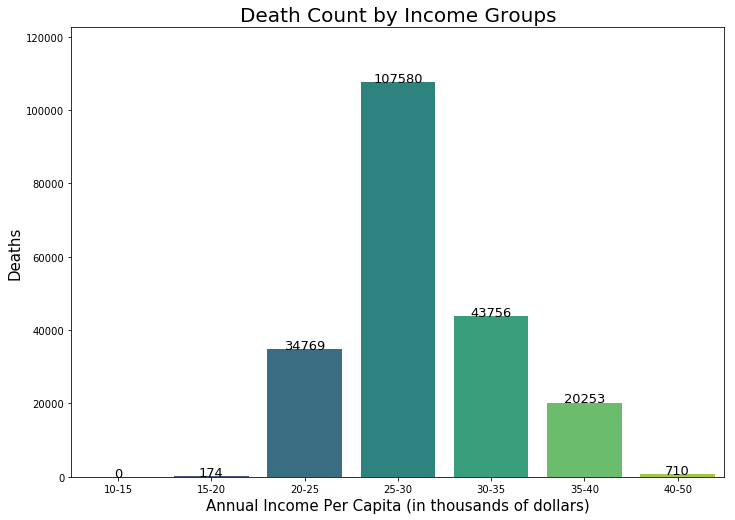

In [188]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

mortality_income = sns.barplot(x="IncomeGroups", y="Deaths", data=income_deaths_df, palette="viridis")

for index, row in income_deaths_df.iterrows():
    mortality_income.text(row.name,row.Deaths,row.Deaths, color="black",ha="center",fontsize=13)
plt.title("Death Count by Income Groups",size=20)
plt.xlabel("Annual Income Per Capita (in thousands of dollars)",size=15)
plt.ylabel("Deaths",size=15)
plt.ylim(0,max(income_deaths_df["Deaths"])+15000)

# Number of Deaths Across Time and State

+ find total deaths across 2009 - 2016 , sort_by = True, top 5 or 10 ... line graph of death reates across selected years

In [35]:
totaldeath_state = opioid_df.groupby(["State"])["Deaths"].sum().reset_index().sort_values(
    by="Deaths",ascending=False).reset_index(drop=True)

top_totaldeath_state = totaldeath_state.head(10)
top_totaldeath_state

,State,Deaths
0,Florida,18716.0
1,California,17209.0
2,New York,16698.0
3,Ohio,11402.0
4,Texas,10531.0
5,Michigan,9614.0
6,Massachusetts,9514.0
7,Pennsylvania,7863.0
8,North Carolina,6623.0
9,New Jersey,6108.0


In [36]:
year_state_deaths = opioid_df.loc[(opioid_df["State"] == "Florida") | 
             (opioid_df["State"] == "California") |
              (opioid_df["State"]== "New York") | 
              (opioid_df["State"] == "Ohio") |
              (opioid_df["State"] == "Texas") | 
              (opioid_df["State"] == "Michigan") | 
              (opioid_df["State"] == "Massachusetts") | 
              (opioid_df["State"] == "Pennsylvania") | 
              (opioid_df["State"] == "North Carolina") | 
              (opioid_df["State"] == "New Jersey"), ["Year","State","Deaths"]]
year_state_deaths_df = year_state_deaths.groupby(["Year","State"])["Deaths"].sum().reset_index()
year_state_deaths_df.head()

,Year,State,Deaths
0,2009,California,2108.0
1,2009,Florida,2267.0
2,2009,Massachusetts,754.0
3,2009,Michigan,1038.0
4,2009,New Jersey,125.0


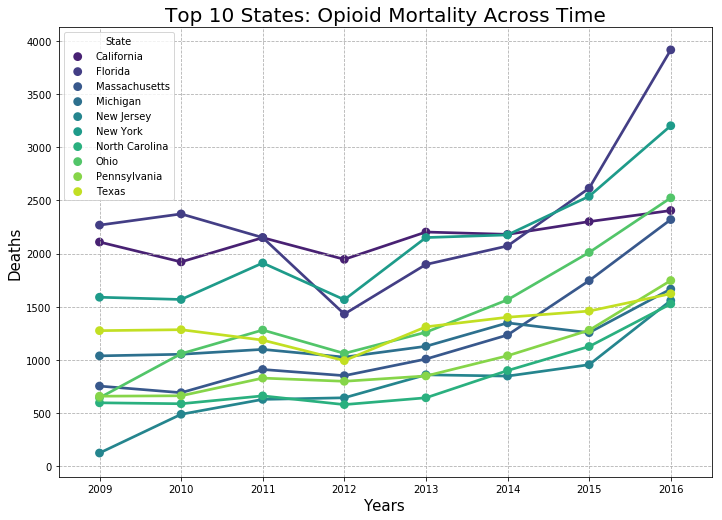

In [44]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.pointplot(x="Year",y="Deaths", data=year_state_deaths_df,hue="State",palette="viridis")
plt.grid(linestyle="dashed")
plt.xlabel("Years", size = 15)
plt.ylabel("Deaths", size = 15)
plt.title ("Top 10 States: Opioid Mortality Across Time", size=20)

In [39]:
top5_year_state_deaths = opioid_df.loc[(opioid_df["State"] == "Florida") | 
             (opioid_df["State"] == "California") |
              (opioid_df["State"]== "New York") | 
              (opioid_df["State"] == "Ohio") |
              (opioid_df["State"] == "Texas") , ["Year","State","Deaths"]]
year5_state_deaths_df = top5_year_state_deaths.groupby(["Year","State"])["Deaths"].sum().reset_index()
year5_state_deaths_df.head()

,Year,State,Deaths
0,2009,California,2108.0
1,2009,Florida,2267.0
2,2009,New York,1589.0
3,2009,Ohio,644.0
4,2009,Texas,1275.0


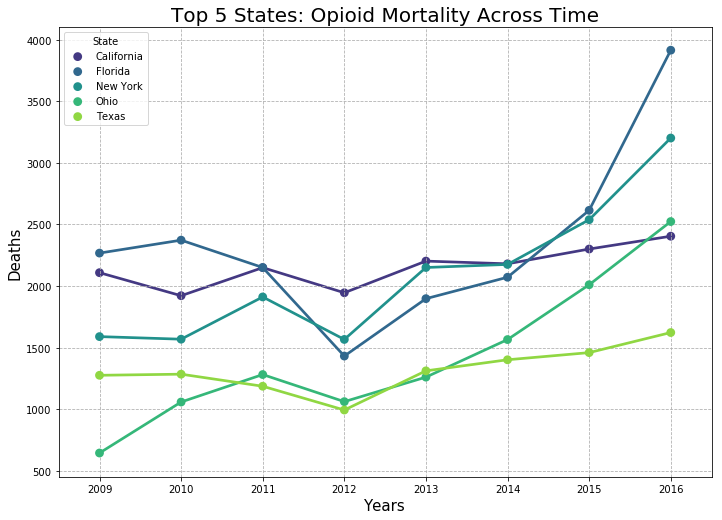

In [42]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.pointplot(x="Year",y="Deaths", data=year5_state_deaths_df,hue="State",palette="viridis")
plt.grid(linestyle="dashed")
plt.xlabel("Years", size = 15)
plt.ylabel("Deaths", size = 15)
plt.title ("Top 5 States: Opioid Mortality Across Time", size=20)

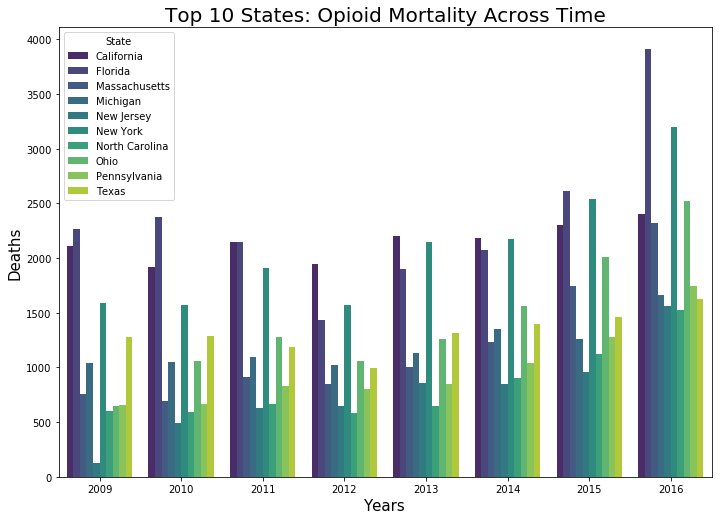

In [43]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7,8.27)
sns.barplot(x="Year", y="Deaths",data=year_state_deaths_df, hue="State", palette="viridis")
plt.xlabel("Years", size = 15)
plt.ylabel("Deaths", size = 15)
plt.title ("Top 10 States: Opioid Mortality Across Time", size=20)

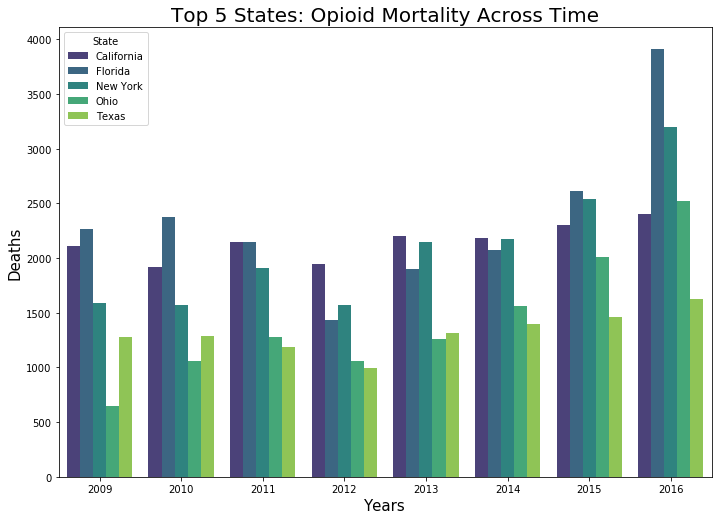

In [155]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7,8.27)
sns.barplot(x="Year", y="Deaths",data=year5_state_deaths_df, hue="State", palette="viridis")
plt.xlabel("Years", size = 15)
plt.ylabel("Deaths", size = 15)
plt.title ("Top 5 States: Opioid Mortality Across Time", size=20)